# Create Features

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [3]:
def create_feature_matrix(sample_size, n_features, x_min, x_max):
    #create sample_size*n_features with x_min and x_max
    #put this features in a 1x2 vector 
    finalNpArray = []
    
    #ihc kann eine range schleife eerstellen die in jedem durchgang ein np array mit n feature vectros erstellt
    for i in range(sample_size):
        x = 0
        x = np.random.uniform(x_min, x_max, n_features)
        x = x.tolist()
        finalNpArray.append(x)
    arr = np.array(finalNpArray)
        
    return arr
    
    raise NotImplementedError("You should implement this!")

In [4]:
sample_size = 100
n_features = 2
x_min = [1.5, -0.5]
x_max = [11., 5.0]

X = create_feature_matrix(sample_size, n_features, x_min, x_max)
X

array([[ 4.78382455,  1.41560726],
       [10.17887532,  3.18137732],
       [ 9.38826466,  1.12803442],
       [ 4.21820533,  0.01575751],
       [ 2.7586131 ,  2.61432458],
       [10.11622257, -0.24464219],
       [ 8.65709851,  1.59553748],
       [ 4.68861745,  3.89025127],
       [ 7.97883804,  3.90638856],
       [ 6.56807801,  3.34625443],
       [10.58744094,  4.22825628],
       [ 8.1738394 , -0.23810593],
       [ 7.58045149, -0.23124303],
       [ 5.54689017,  4.58971715],
       [ 4.93732268,  3.62252497],
       [10.45116704,  1.12668143],
       [ 9.80732451,  3.53527849],
       [ 9.87310656,  4.69199618],
       [ 8.36841616,  1.90138616],
       [ 9.27267949,  2.06878254],
       [ 3.86136664,  1.48862148],
       [ 2.30031441,  3.46239755],
       [ 1.6333232 ,  4.08369939],
       [ 2.39036668,  0.15567401],
       [ 2.32399585,  3.60329694],
       [ 6.32687729,  3.60399804],
       [ 4.86982252,  0.32927408],
       [ 4.27478113,  2.17266636],
       [ 6.38999907,

In [5]:
assert len(X[:,0]) == sample_size
assert len(X[0,:]) == n_features
for i in range(n_features):
    assert np.max(X[:,i]) <= x_max[i]
    assert np.min(X[:,i]) >= x_min[i]

# Linear Hypothesis

In [6]:
def linear_hypothesis(thetas):
    return lambda x: np.sum(thetas*np.insert(x, 0, 1, axis=1), axis=1)
    ''' Combines given list argument in a linear equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a linear function based on thetas and x
    '''
    raise NotImplementedError("You should implement this!")

In [7]:
linearHypothesisLambda = linear_hypothesis([.1,.2,.3])

linearHypothesisLambda(X)

array([1.48144709, 3.09018826, 2.31606326, 0.94836832, 1.43601999,
       2.04985186, 2.31008095, 2.20479887, 2.86768418, 2.41749193,
       3.48596507, 1.6633361 , 1.54671739, 2.58629318, 2.17422203,
       2.52823784, 3.12204845, 3.48222016, 2.34409908, 2.57517066,
       1.31885977, 1.59878215, 1.65177446, 0.62477554, 1.64578825,
       2.44657487, 1.17274673, 1.60675613, 1.38231613, 1.10084349,
       1.76088858, 1.28057493, 1.58470837, 2.23489106, 2.53743158,
       2.65565056, 1.40946847, 1.43314148, 2.44818848, 1.92706352,
       1.81050633, 2.0588326 , 1.05870162, 1.56962035, 2.78656615,
       3.17706899, 0.82109892, 0.64444173, 1.39646508, 2.64176052,
       2.45826411, 3.17773278, 3.15069266, 1.15102102, 2.52127109,
       1.83402359, 1.26921089, 2.77081247, 3.6145234 , 2.19781191,
       1.97194565, 1.21144327, 1.48319298, 1.30360907, 1.9779262 ,
       2.59436217, 1.2467091 , 0.87506845, 1.0599025 , 3.65623626,
       2.32069191, 2.38341275, 0.90019129, 2.34566246, 2.22603

In [8]:
assert (len(linear_hypothesis([.1,.2,.3])(X))) == sample_size

# Generate Target Values

In [9]:
def generate_targets(X, theta, sigma):
    #y = das ergebnis meiner linear hypothesis
    #was ist gaussian noise?
    lH = linear_hypothesis(theta)(X)
    noise = np.random.normal(0, sigma, lH.shape)
    y = lH+noise
    return y
    ''' Combines given arguments in a linear equation with X, 
    adds some Gaussian noise and returns the result
    
    Args:
        X: 2D numpy feature matrix
        theta: list of coefficients
        sigma: standard deviation of the gaussian noise
        
    Returns:
        target values for X
    '''
    raise NotImplementedError("You should implement this!")

In [10]:
theta = (2., 3., -4.)
#why do we use here so much noise?
sigma = 3.
y = generate_targets(X, theta, sigma)
print(y)

[ 12.35633031  20.14249553  27.66674007  13.73673698   4.49412895
  35.03506478  17.39611916   0.29725021  11.21267398   5.90208568
  15.82633594  28.31782341  22.92711956  -2.32533037   1.13264545
  31.15848526  13.11607016   9.51483671  22.3455126   24.40656619
   4.50222968  -3.40208956  -9.46477646   5.15374598  -5.83916406
   8.4122554   20.68212595   6.63542936  24.45654013   2.43804001
   6.44855239   1.95636504  -4.93199554  18.4358975   22.70152123
   4.51269271   2.5827287   -6.16668396   1.94976698  19.16773992
  -8.17886366   5.87198818  10.27142569   1.85920959  28.77816622
  16.29595742  13.47346272  21.24430024  -8.6471478   19.04608998
   0.72168517  23.89154355  10.92780634  17.78175663  19.62951853
  -2.95119501  26.36999962  11.31249419  19.23382181  -3.23694473
  29.0517914   19.69777428  10.44183708  13.52275998  32.09547425
  29.04573561 -10.50174094   6.41790103  14.73532208  17.50150289
  25.80561061  30.58158969   1.88508076  -3.45783288  35.45922302
  16.18480

In [11]:
assert len(y) == sample_size

# Plot the data

In [12]:
%matplotlib notebook
import random

def plot_data_scatter(features, targets):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(features[:,0], features[:,0], targets)
    return plt.show()
    """ Plots the features and the targets in a 3D scatter plot
    
    Args:
        features: 2D numpy-array features
        targets: ltargets
    """
    raise NotImplementedError("You should implement this!")

<IPython.core.display.Javascript object>


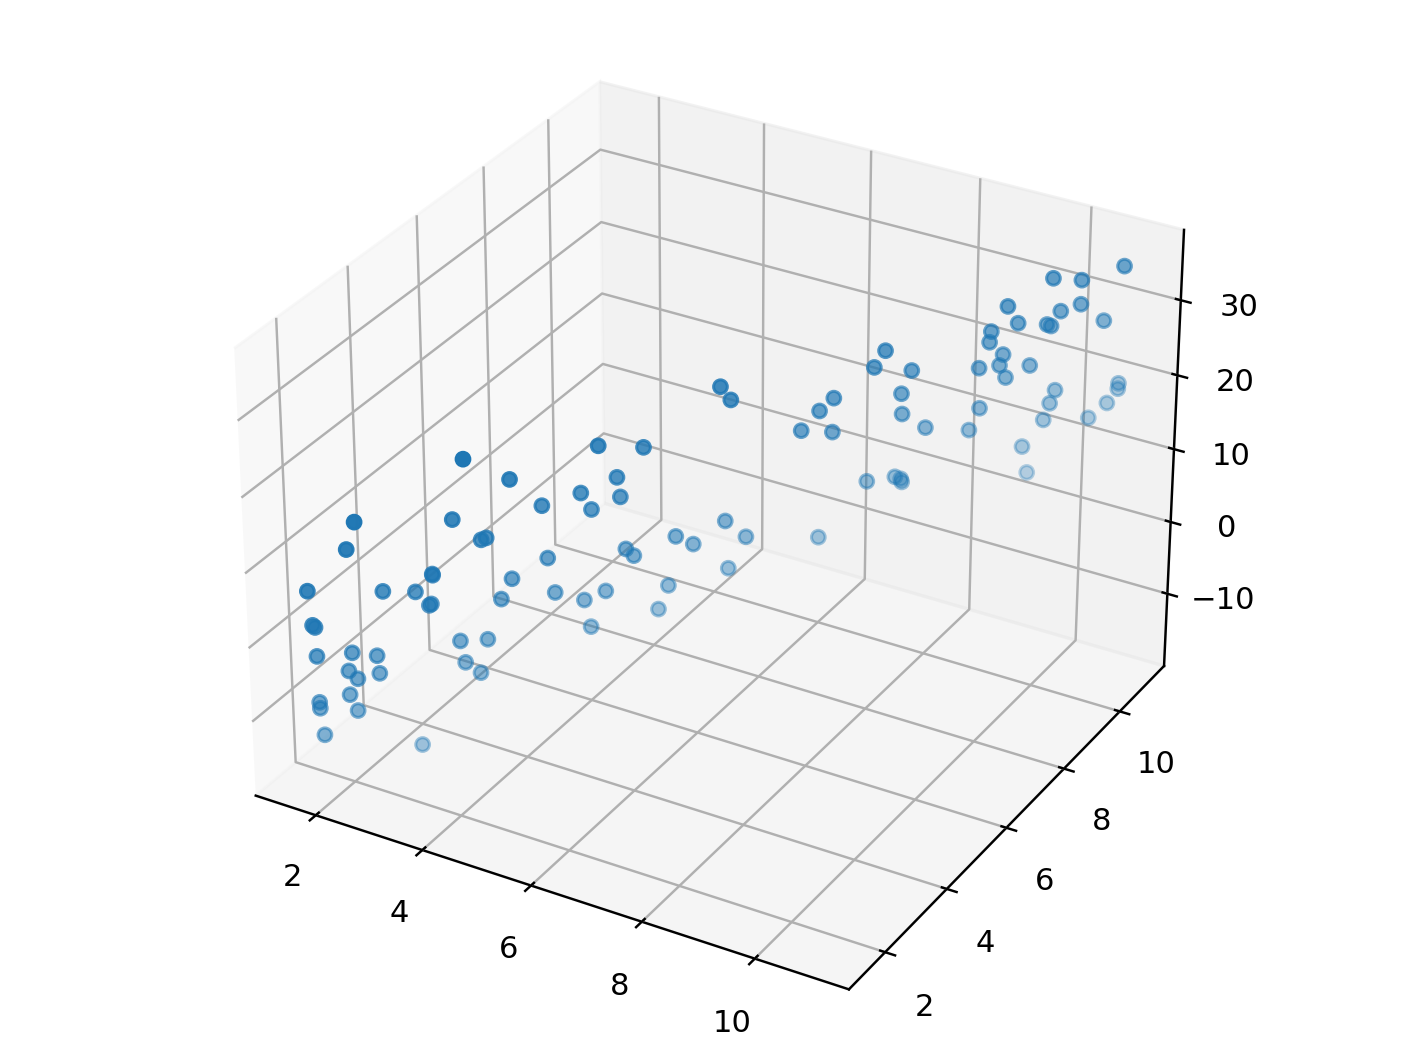

In [13]:
plot_data_scatter(X, y) 

# Cost Function

In [14]:
def mse_cost_function(x, y):   
    return lambda theta: 1/(2*(len(x)))*(sum((linear_hypothesis(theta)(x)-y)**2))
    ''' Implements MSE cost function as a function J(theta) on given traning data 
    
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta) that models the cost function
    '''
    raise NotImplementedError("You should implement this!")

In [15]:
J = mse_cost_function(X, y)
print(J(theta))

5.724294569843657


# Gradient Descent

In [44]:
def update_theta(x, y, theta, learning_rate):
    #ich muss eine formel aufstellen die aus den gegebenen argumenten das ergebnis der kettenregel berechnet
    #das ergebnis welches ich für jedes theta erhalte muss ich von dem alten theta abziehen
    #es geht darum für jedes alte theta ein neues theta zu brerechnen 
    print(linear_hypothesis(theta)(x))
    theta0 = 1 / 1*(len(x))*(sum((linear_hypothesis(theta)(x))-y))
    theta1 = 1 / 1*(len(x))*(sum(((linear_hypothesis(theta)(x))-y)*x))
    update = []
    for i in range (len(theta)):
        if i == 0:
            update.append(theta[i] - theta0 * learning_rate)
        else:
            update.append(theta[i] - theta1 * learning_rate)
    
    return update
    
    ''' Updates learnable parameters theta 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        x: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient 
        
    Returns:
        theta: Updated theta vector
    '''
    raise NotImplementedError("You should implement this!")

In [45]:
print(update_theta(X, y, theta, 0.003))

[ 10.68904461  19.81111671  25.65265628  14.59158595  -0.18145901
  33.3272365   21.58914561   0.50484728  10.3109599    8.31921629
  16.84929767  27.47394194  25.66632659   0.28180191   2.32186816
  28.84677541  17.28085955  12.85133497  19.49970385  21.5429083
   7.62961397  -4.94864695  -9.43482796   8.548404    -5.44120021
   6.56463968  15.29237121   6.13367798  21.11244629   5.15837071
   9.175061     7.42295908  -6.6107125   16.41987391  23.82736008
   9.95185825   1.17469445  -4.0294444    6.74658463  18.46831203
  -9.60098108   9.62664406   9.16359391   7.07614561  23.44981693
  12.94139428  10.51143498  13.65289749  -6.05669411  20.75274221
   2.65118302  16.89075797   8.79782538   9.84247908  17.20257739
  -2.6751992   21.9455332   13.47045294  17.06175775  -5.74325217
  30.33712092  17.70546689   3.83037799  14.94593989  31.31475618
  25.74346293  -1.60629174   8.43356712  15.63258667  15.80273169
  26.51255606  29.44255323   0.30895771  -0.95480018  35.69989521
  14.846149

ValueError: operands could not be broadcast together with shapes (100,) (100,2) 

In [38]:
def gradient_descent(learning_rate, theta, iterations, x, y, cost_function):
    
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros(iterations)
    
    
    for i in range(iterations):
        theta = update_theta(x, y, theta, learning_rate)
        theta_hist[i] = theta
        cost_hist[i] = mse_cost_function(x, y)(theta)
    return cost_hist, theta_hist
    ''' Minimize theta values of a linear model based on MSE cost function
    
    Args:
        learning_rate: scalar, scales the negative gradient 
        theta: initial theta values
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    raise NotImplementedError("You should implement this!")

In [39]:
# Your implementation:

alpha = 42.42 # assign an appropriate value
nb_iterations = 1337 # assign an appropriate value
start_values_theta = [42., 42., 42.] # assign appropriate values
history_cost, history_theta = gradient_descent(alpha, start_values_theta, nb_iterations, X, y,  mse_cost_function)

ValueError: operands could not be broadcast together with shapes (100,) (100,2) 

In [20]:
print(np.zeros(1000))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [27]:
print(np.random.random())

0.28320891377915847


In [31]:
J = mse_cost_function(X, y)
print(J(theta))

5.724294569843657


In [ ]:
#zuerst wird start thetas und cost init